In [81]:
import pandas as pd 
import numpy as np

In [83]:
df = pd.read_excel("AAC Formulations and bibliography.xlsx")

In [84]:
pd.set_option('display.max_columns', None)


In [87]:
df

,Idx_Sample,Ref.,Mixture Code in Ref,OPC (kg/m3),FA (kg/m3),GGBFS (kg/m3),SF (kg/m3),MK (kg/m3),Other SCM (kg/m3),NaOH specific gravity,Na2SiO3 specific gravity,Total Na2SiO3 (kg in 1m3 of mix),Na2O (l),SiO2 (l),H2O,Na2O (Dry),SiO2 (Dry),Water,Total NaOH (kg in 1m3 mix),Concentration (M) NaOH,Water.1,NaOH (Dry),Additional water (kg in 1m3 mix),Superplasticizer (kg in 1m3 mix),Total water (in solutions + additional) (kg in 1m3 mix),7-d Cubic compressive strength (MPa),28-d Cubic compressive strength (MPa),56-d Cubic compressive strength (MPa),90-d Cubic compressive strength (MPa),180-d Cubic compressive strength (MPa),365-d Cubic compressive strength (MPa),7-d Cylindrical compressive strength (MPa),12-d Cylindrical compressive strength (MPa),14-d Cylindrical compressive strength (MPa),21-d Cylindrical compressive strength (MPa),28-d Cylindrical compressive strength (MPa),56-d Cylindrical compressive strength (MPa),90-d Cylindrical compressive strength (MPa),180-d Cylindrical compressive strength (MPa),365-d Cylindrical compressive strength (MPa),3-d fst-cube (MPa),7-d fst-cube (MPa),14-d fst-cube (MPa),21-d fst-cube (MPa),28-d fst-cube (MPa),56-d fst-cube (MPa),180-d fst-cube (MPa),3-d fst-cylinder (MPa),7-d fst-cylinder (MPa),14-d fst-cylinder (MPa),21-d fst-cylinder (MPa),28-dfst-cylinder (MPa),56-d fst-cylinder (MPa),90-d fst-cylinder (MPa),180-d fst-cylinder (MPa),365-d fst-cylinder (MPa),3-d Ec (MPa),7-d Ec (MPa),14-d Ec (MPa),21-d Ec (MPa),28-d Ec (MPa),56-d Ec (MPa),90-d Ec (MPa),180-d Ec (MPa),365-d Ec (MPa),3-d WA (%),7-d WA (%),14-d WA (%),21-d WA (%),28-d WA (%),56-d WA (%),90-d WA (%),180-d WA (%),365-d WA (%),3-d Porosity/AVPV (%),7-d Porosity/AVPV (%),14-d Porosity/AVPV (%),21-d Porosity/AVPV (%),28-d Porosity/AVPV (%),56-d Porosity/AVPV (%),90-d Porosity/AVPV (%),180-d Porosity/AVPV (%),365-d Porosity/AVPV (%),3-d Water permeability (mm),7-d Water permeability (mm),14-d Water permeability (mm),21-d Water permeability (mm),28-d Water permeability (mm),56-d Water permeability (mm),90-d Water permeability (mm),180-d Water permeability (mm),365-d Water permeability (mm),3-d Abrasion resistance (mm),7-d Abrasion resistance (mm),14-d Abrasion resistance (mm),21-d Abrasion resistance (mm),28-d Abrasion resistance (mm),56-d Abrasion resistance (mm),90-d Abrasion resistance (mm),180-d Abrasion resistance (mm),365-d Abrasion resistance (mm),3-d UPV (m/s),7-d UPV (m/s),14-d UPV (m/s),21-d UPV (m/s),28-d UPV (m/s),56-d UPV (m/s),90-d UPV (m/s),180-d UPV (m/s),365-d UPV (m/s),3-d sorptivity(m/s^0.5),7-d sorptivity(m/s^0.5),14-d sorptivity(m/s^0.5),21-d sorptivity(m/s^0.5),28-d sorptivity(m/s^0.5),56-d sorptivity(m/s^0.5),90-d sorptivity(m/s^0.5),180-d sorptivity(m/s^0.5),365-d sorptivity(m/s^0.5),Slump (mm),flowtable,Seeting I,Setting F,CO2 footprint\n(kg emision per 1m3 of samples produced and cured)\n[108] and [109] used,FA density (kg/m3),GGBFS density (kg/m3)
0,1,[2],FA-I,NaN,476.0,NaN,NaN,NaN,NaN,2.13,1.53,48.00,0.147,0.294,0.56,7.06,14.11,26.8320,120.00,8.0,81.6000,38.4000,0.0,0.0,108.4320,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.048733,NaN,NaN
1,2,[2],FA-I,NaN,476.0,NaN,NaN,NaN,NaN,2.13,1.53,120.00,0.147,0.294,0.56,17.64,35.28,67.0800,48.00,8.0,32.6400,15.3600,0.0,0.0,99.7200,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.923522

In [89]:
df.columns

Index(['Idx_Sample', 'Ref.', 'Mixture Code in Ref', 'OPC (kg/m3)',
       'FA (kg/m3)', 'GGBFS (kg/m3)', 'SF (kg/m3)', 'MK (kg/m3)',
       'Other SCM (kg/m3)', 'NaOH specific gravity',
       ...
       '90-d sorptivity(m/s^0.5)', '180-d sorptivity(m/s^0.5)',
       '365-d sorptivity(m/s^0.5)', 'Slump (mm)', 'flowtable', 'Seeting I',
       'Setting F',
       'CO2 footprint\n(kg emision per 1m3 of samples produced and cured)\n[108] and [109] used',
       'FA density (kg/m3)', 'GGBFS density (kg/m3)'],
      dtype='object', length=126)

In [91]:
# list all the columns you want to drop
cols_to_drop = [
    "56-d Cubic compressive strength (MPa)",
    "180-d Cubic compressive strength (MPa)",
    "365-d Cubic compressive strength (MPa)",
    "12-d Cylindrical compressive strength (MPa)",
    "14-d Cylindrical compressive strength (MPa)",
    "21-d Cylindrical compressive strength (MPa)",
    "56-d Cylindrical compressive strength (MPa)",
    "180-d Cylindrical compressive strength (MPa)",
    "365-d Cylindrical compressive strength (MPa)",
    "3-d fst-cube (MPa)",
    "7-d fst-cube (MPa)",
    "14-d fst-cube (MPa)",
    "21-d fst-cube (MPa)",
    "28-d fst-cube (MPa)",
    "56-d fst-cube (MPa)",
    "180-d fst-cube (MPa)",
    "3-d fst-cylinder (MPa)",
    "7-d fst-cylinder (MPa)",
    "14-d fst-cylinder (MPa)",
    "21-d fst-cylinder (MPa)",
    "28-dfst-cylinder (MPa)",
    "56-d fst-cylinder (MPa)",
    "90-d fst-cylinder (MPa)",
    "180-d fst-cylinder (MPa)",
    "365-d fst-cylinder (MPa)",
    "3-d Ec (MPa)",
    "7-d Ec (MPa)",
    "14-d Ec (MPa)",
    "21-d Ec (MPa)",
    "28-d Ec (MPa)",
    "56-d Ec (MPa)",
    "90-d Ec (MPa)",
    "180-d Ec (MPa)",
    "365-d Ec (MPa)",
    "3-d WA (%)",
    "7-d WA (%)",
    "14-d WA (%)",
    "21-d WA (%)",
    "56-d WA (%)",
    "90-d WA (%)",
    "180-d WA (%)",
    "365-d WA (%)",
    "3-d Porosity/AVPV (%)",
    "7-d Porosity/AVPV (%)",
    "14-d Porosity/AVPV (%)",
    "21-d Porosity/AVPV (%)",
    "56-d Porosity/AVPV (%)",
    "90-d Porosity/AVPV (%)",
    "180-d Porosity/AVPV (%)",
    "365-d Porosity/AVPV (%)",
    "3-d Water permeability (mm)",
    "7-d Water permeability (mm)",
    "14-d Water permeability (mm)",
    "21-d Water permeability (mm)",
    "56-d Water permeability (mm)",
    "90-d Water permeability (mm)",
    "180-d Water permeability (mm)",
    "365-d Water permeability (mm)",
    "3-d Abrasion resistance (mm)",
    "7-d Abrasion resistance (mm)",
    "14-d Abrasion resistance (mm)",
    "21-d Abrasion resistance (mm)",
    "56-d Abrasion resistance (mm)",
    "90-d Abrasion resistance (mm)",
    "180-d Abrasion resistance (mm)",
    "365-d Abrasion resistance (mm)",
    "3-d UPV (m/s)",
    "7-d UPV (m/s)",
    "14-d UPV (m/s)",
    "21-d UPV (m/s)",
    "56-d UPV (m/s)",
    "90-d UPV (m/s)",
    "180-d UPV (m/s)",
    "365-d UPV (m/s)",
    "3-d sorptivity(m/s^0.5)",
    "7-d sorptivity(m/s^0.5)",
    "14-d sorptivity(m/s^0.5)",
    "21-d sorptivity(m/s^0.5)",
    "56-d sorptivity(m/s^0.5)",
    "90-d sorptivity(m/s^0.5)",
    "180-d sorptivity(m/s^0.5)",
    "365-d sorptivity(m/s^0.5)"
]

# drop them (errors='ignore' will skip any names not found)
df.drop(columns=cols_to_drop, errors='ignore', inplace=True)


In [156]:
for col in df.columns:
    print(col)

Idx_Sample
Ref.
Mixture Code in Ref
OPC (kg/m3)
FA (kg/m3)
GGBFS (kg/m3)
SF (kg/m3)
MK (kg/m3)
Other SCM (kg/m3)
NaOH specific gravity
Na2SiO3 specific gravity
Total Na2SiO3 (kg in 1m3 of mix)
Na2O (l)
SiO2 (l)
H2O
Na2O (Dry)
SiO2 (Dry)
Water
Total NaOH (kg in 1m3 mix)
Concentration (M) NaOH
Water.1
NaOH (Dry)
Additional water (kg in 1m3 mix)
Superplasticizer (kg in 1m3 mix)
Total water (in solutions + additional) (kg in 1m3 mix)
7-d Cubic compressive strength (MPa)
28-d Cubic compressive strength (MPa)
90-d Cubic compressive strength (MPa) 
365-d Cubic compressive strength (MPa) 
7-d Cylindrical compressive strength (MPa)
28-d Cylindrical compressive strength (MPa)
56-d Cylindrical compressive strength (MPa) 
90-d Cylindrical compressive strength (MPa)
180-d Ec (MPa) 
28-d WA (%)
28-d Porosity/AVPV (%)
28-d Water permeability (mm)
28-d Abrasion resistance (mm)
28-d UPV (m/s)
28-d sorptivity(m/s^0.5)
Slump (mm)
flowtable
Seeting I
Setting F
CO2 footprint
(kg emision per 1m3 of samples 

In [136]:
# list all the columns you want to drop
cols_to_drop = ['180-d Ec (MPa)']

# drop them (errors='ignore' will skip any names not found)
df.drop(columns=cols_to_drop, errors='ignore', inplace=True)


In [98]:
df['FA density (kg/m3)'].mode()

0    2.42
Name: FA density (kg/m3), dtype: float64

In [70]:
df['GGBFS density (kg/m3)'].mode()

0    2.9
Name: GGBFS density (kg/m3), dtype: float64

In [100]:
df.fillna({'FA density (kg/m3)': 2.42,
               'GGBFS density (kg/m3)' : 2.9
              }, inplace=True)

In [108]:
# first convert density columns from g/cm³ to kg/m³
df["FA density (kg/m3)"]   = df["FA density (kg/m3)"]   * 1000
df["GGBFS density (kg/m3)"] = df["GGBFS density (kg/m3)"] * 1000

# now compute the volume‐fraction percentages correctly
df["%FA in Mix ratio"]   = df["FA (kg/m3)"]   / df["FA density (kg/m3)"]   * 100
df["%GGBFS in Mix ratio"] = df["GGBFS (kg/m3)"] / df["GGBFS density (kg/m3)"] * 100


In [146]:
# 1) constants
MOLAR_MASS_NA2SI3 = 122.06    # g/mol
# if your specific gravity is unitless, density_solution = sg * 1000 [kg/m³]
# if your H2O% column is percent water by mass, water_frac = H2O%/100

# 2) convert SG → density [kg/m³]
df["Na2SiO3_density_kg_m3"] = df["Na2SiO3 specific gravity"] * 1000

# 3) compute solute mass‐fraction
df["solute_frac"] = 1 - df["H2O"] / 100

# 4) molarity of the Na2SiO3 solution itself (mol per L of solution)
#    density × solute_frac = kg solute per m³ solution
#    → g solute per m³ = *1000
#    / molar mass → mol per m³
#    /1000 → mol per L
df["Na2SiO3_molarity_solution"] = (
    df["Na2SiO3_density_kg_m3"]
    * df["solute_frac"]
    * 1000           # → g solute / m³
    / MOLAR_MASS_NA2SI3  # → mol / m³
    / 1000             # → mol / L
)

# 5) if you want the molarity “in the mix” (moles of Na2SiO3 per L of concrete):
#    Total Na2SiO3 (kg per m³ of mix) × solute_frac = kg pure Na2SiO3 per m³ mix
#    → g solute per m³ mix = *1000
#    / molar mass → mol per m³ mix
#    /1000 → mol per L of mix
df["Na2SiO3_molarity_in_mix"] = (
    df["Total Na2SiO3 (kg in 1m3 of mix)"]
    * df["solute_frac"]
    * 1000
    / MOLAR_MASS_NA2SI3
    / 1000
)

# clean up helper columns if you like
df.drop(columns=["Na2SiO3_density_kg_m3", "solute_frac"], inplace=True)


In [152]:
# 1) molar masses (g/mol)
M_MASS_NaOH     = 40.00     # NaOH
M_MASS_Na2SiO3  = 122.06    # Na₂SiO₃

# 2) moles of each added in 1 m³ of mix
df["moles_NaOH"]      = df["Total NaOH (kg in 1m3 mix)"]    * 1000  / M_MASS_NaOH
df["moles_Na2SiO3"]   = df["Total Na2SiO3 (kg in 1m3 of mix)"] * 1000  / M_MASS_Na2SiO3

# 3) volume of activator solutions required (L per m³ of mix)
df["vol_NaOH_L"]      = df["moles_NaOH"]    / df["Concentration (M) NaOH"]
df["vol_Na2SiO3_L"]   = df["moles_Na2SiO3"] / df["Na2SiO3_molarity_solution"]

# 4) compute both ratios
#    – by volume: liters of NaOH solution per liter of Na₂SiO₃ solution
df["Ratio NaOH to Na2SiO3 (by volume)"] = df["vol_NaOH_L"] / df["vol_Na2SiO3_L"]

#    – by mass: kg of NaOH solids per kg of Na₂SiO₃ solids
df["Ratio NaOH to Na2SiO3 (by mass)"]  = (
    df["Total NaOH (kg in 1m3 mix)"] 
    / df["Total Na2SiO3 (kg in 1m3 of mix)"]
)

# 5) drop interim columns
df.drop(
    columns=[
      "moles_NaOH",
      "moles_Na2SiO3",
      "vol_NaOH_L",
      "vol_Na2SiO3_L"
    ], 
    inplace=True
)


In [277]:
df.head(30)

,Idx_Sample,Ref.,Mixture Code in Ref,FA (kg/m3),GGBFS (kg/m3),Total Na2SiO3 (kg in 1m3 of mix),Total NaOH (kg in 1m3 mix),NaOH Concentration (M),Superplasticizer (kg in 1m3 mix),7-d Cubic compressive strength (MPa),28-d Cubic compressive strength (MPa),90-d Cubic compressive strength (MPa),365-d Cubic compressive strength (MPa),7-d Cylindrical compressive strength (MPa),28-d Cylindrical compressive strength (MPa),56-d Cylindrical compressive strength (MPa),90-d Cylindrical compressive strength (MPa),180-d Ec (MPa),28-d WA (%),28-d Porosity/AVPV (%),28-d Water permeability (mm),28-d Abrasion resistance (mm),28-d UPV (m/s),28-d sorptivity(m/s^0.5),Slump (mm),flowtable,Seeting I,Setting F,CO2 Footprint (kg/m3),% FA in Mix,% GGBFS in Mix,Na2SiO3 Concentration (M),NaOH/Na2SiO3 Volume Ratio,NaOH/Na2SiO3 Mass Ratio
0,1,[2],FA-I,476.0,NaN,48.0,120.0,8.0,0.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.048733,19.669421,0.0,12.464624,11.886188,2.500000
1,2,[2],FA-I,476.0,NaN,120.0,48.0,8.0,0.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.923522,19.669421,0.0,12.464624,1.901790,0.400000
2,3,[2],FA-I,476.0,NaN,120.0,48.0,8.0,0.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.131856,19.669421,0.0,12.464624,1.901790,0.400000
3,4,[2],FA-I,476.0,NaN,120.0,48.0,8.0,0.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.340189,19.669421,0.0,12.464624,1.901790,0.400000
4,5,[2],FA-I,476.0,NaN,120.0,48.0,8.0,0.0,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.597133,19.669421,0.0,12.464624,1.901790,0.400000
5,6,[2],FA-I,476.0,NaN,120.0,48.0,8.0,0.0,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.847133,19.669421,0.0,12.464624,1.901790,0.400000
6,7,[2],FA-I,476.0,NaN,120.0,48.0,8.0,0.0,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.097133,19.669421,0.0,12.464624,1.901790,0.400000
7,8,[2],FA-I,476.0,NaN,48.0,120.0,14.0,0.0,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.200733,19.669421,0.0,12.464624,6.792107,2.500000
8,9,[2],FA-I,476.0,NaN,120.0,48.0,14.0,0.0,NaN,NaN,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.866267,19.669421,0.0,12.464624,1.086737,0.400000
9,10,[2],FA-I,476.0,NaN,120.0,48.0,14.0,0.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.192656,19.669421,0.0,12.464624,1.086737,0.400000


In [158]:
# write the DataFrame to CSV (without the index column)
df.to_csv("Geopolymer_final.csv", index=False)


In [160]:
# list of columns to remove
cols_to_drop = [
    "OPC (kg/m3)",
    "SF (kg/m3)",
    "MK (kg/m3)",
    "Other SCM (kg/m3)",
    "NaOH specific gravity",
    "Na2SiO3 specific gravity",
    "Na2O (l)",
    "SiO2 (l)",
    "H2O",
    "Na2O (Dry)",
    "SiO2 (Dry)",
    "Water",
    "Water.1",
    "NaOH (Dry)",
    "Additional water (kg in 1m3 mix)",
    "Total water (in solutions + additional) (kg in 1m3 mix)",
    "180-d Ec (MPa)",
    "FA density (kg/m3)",
    "GGBFS density (kg/m3)",
    "Na2SiO3_molarity_in_mix"
]

# drop them in-place
df.drop(columns=cols_to_drop, errors='ignore', inplace=True)

# save the resulting DataFrame
df.to_csv("Geopolymer_final_drop.csv", index=False)


In [162]:
df.columns

Index(['Idx_Sample', 'Ref.', 'Mixture Code in Ref', 'FA (kg/m3)',
       'GGBFS (kg/m3)', 'Total Na2SiO3 (kg in 1m3 of mix)',
       'Total NaOH (kg in 1m3 mix)', 'Concentration (M) NaOH',
       'Superplasticizer (kg in 1m3 mix)',
       '7-d Cubic compressive strength (MPa)',
       '28-d Cubic compressive strength (MPa)',
       '90-d Cubic compressive strength (MPa) ',
       '365-d Cubic compressive strength (MPa) ',
       '7-d Cylindrical compressive strength (MPa)',
       '28-d Cylindrical compressive strength (MPa)',
       '56-d Cylindrical compressive strength (MPa) ',
       '90-d Cylindrical compressive strength (MPa)', '180-d Ec (MPa) ',
       '28-d WA (%)', '28-d Porosity/AVPV (%)', '28-d Water permeability (mm)',
       '28-d Abrasion resistance (mm)', '28-d UPV (m/s)',
       '28-d sorptivity(m/s^0.5)', 'Slump (mm)', 'flowtable', 'Seeting I',
       'Setting F',
       'CO2 footprint\n(kg emision per 1m3 of samples produced and cured)\n[108] and [109] used',
       '

In [186]:
df = pd.read_csv("Geopolymer_final_drop.csv")

In [190]:
df.shape

(1630, 34)

In [197]:
# fill NaN values in the two percentage columns with 0
df["%FA in Mix ratio"].fillna(0, inplace=True)
df["%GGBFS in Mix ratio"].fillna(0, inplace=True)


/var/folders/7n/jnsm4rc54z7076rb3t0l20780000gn/T/ipykernel_50415/440697561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["%FA in Mix ratio"].fillna(0, inplace=True)
/var/folders/7n/jnsm4rc54z7076rb3t0l20780000gn/T/ipykernel_50415/440697561.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [207]:
# list of columns to check
cols_to_check = [
    "28-d Cylindrical compressive strength (MPa)",
    "28-d Cubic compressive strength (MPa)",
    "CO2 footprint\n(kg emision per 1m3 of samples produced and cured)\n[108] and [109] used",
    "Ratio NaOH to Na2SiO3 (by volume)",
    "Ratio NaOH to Na2SiO3 (by mass)",
    "%FA in Mix ratio",
    "%GGBFS in Mix ratio",
    "Na2SiO3_molarity_solution",
    "Concentration (M) NaOH"
]

# Option 1: get a Series of counts and print it
nan_counts = df[cols_to_check].isna().sum()
print(nan_counts)

# Option 2: loop and print each count individually
for col in cols_to_check:
    print(f"{col}: {df[col].isna().sum()} NaN values")


28-d Cylindrical compressive strength (MPa)                                                1328
28-d Cubic compressive strength (MPa)                                                       888
CO2 footprint\n(kg emision per 1m3 of samples produced and cured)\n[108] and [109] used       0
Ratio NaOH to Na2SiO3 (by volume)                                                             0
Ratio NaOH to Na2SiO3 (by mass)                                                               0
%FA in Mix ratio                                                                              0
%GGBFS in Mix ratio                                                                           0
Na2SiO3_molarity_solution                                                                     0
Concentration (M) NaOH                                                                        0
dtype: int64
28-d Cylindrical compressive strength (MPa): 1328 NaN values
28-d Cubic compressive strength (MPa): 888 NaN values
CO2 foot

In [205]:
# drop rows where either ratio column is NaN
df.dropna(
    subset=[
        "Ratio NaOH to Na2SiO3 (by mass)",
        "Ratio NaOH to Na2SiO3 (by volume)"
    ],
    inplace=True
)


In [281]:
# drop all rows where "Concentration (M) NaOH" is NaN
df.dropna(subset=["Concentration (M) NaOH"], inplace=True)
df.shape

KeyError: ['Concentration (M) NaOH']

In [176]:
# filter and print all rows where "Concentration (M) NaOH" is NaN
nan_naoh_rows = df[df["Concentration (M) NaOH"].isna()]
nan_naoh_rows

,Idx_Sample,Ref.,Mixture Code in Ref,FA (kg/m3),GGBFS (kg/m3),Total Na2SiO3 (kg in 1m3 of mix),Total NaOH (kg in 1m3 mix),Concentration (M) NaOH,Superplasticizer (kg in 1m3 mix),7-d Cubic compressive strength (MPa),28-d Cubic compressive strength (MPa),90-d Cubic compressive strength (MPa),365-d Cubic compressive strength (MPa),7-d Cylindrical compressive strength (MPa),28-d Cylindrical compressive strength (MPa),56-d Cylindrical compressive strength (MPa),90-d Cylindrical compressive strength (MPa),180-d Ec (MPa),28-d WA (%),28-d Porosity/AVPV (%),28-d Water permeability (mm),28-d Abrasion resistance (mm),28-d UPV (m/s),28-d sorptivity(m/s^0.5),Slump (mm),flowtable,Seeting I,Setting F,CO2 footprint\n(kg emision per 1m3 of samples produced and cured)\n[108] and [109] used,%FA in Mix ratio,%GGBFS in Mix ratio,Na2SiO3_molarity_solution,Ratio NaOH to Na2SiO3 (by volume),Ratio NaOH to Na2SiO3 (by mass)
901,943,[71],C1,NaN,NaN,183.9,NaN,NaN,0.0,24.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,185.21422,0.000000,0.000000,0.0,NaN,NaN
902,944,[71],C2,NaN,NaN,173.7,NaN,NaN,0.0,47.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,175.44642,0.000000,0.000000,0.0,NaN,NaN
903,945,[71],C3,NaN,NaN,162.8,NaN,NaN,0.0,26.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,164.96584,0.000000,0.000000,0.0,NaN,NaN
904,946,[71],C4,NaN,NaN,238.9,NaN,NaN,0.0,58.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,236.60468,0.000000,0.000000,0.0,NaN,NaN
905,947,[71],C5,NaN,NaN,225.0,NaN,NaN,0.0,49.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,223.39510,0.000000,0.000000,0.0,NaN,NaN
906,948,[71],C6,NaN,NaN,210.1,NaN,NaN,0.0,18.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,NaN,NaN,NaN,208.98270,0.000000,0.000000,0.0,NaN,NaN
907,949,[71],C7,NaN,NaN,289.4,NaN,NaN,0.0,65.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,NaN,NaN,NaN,284.05572,0.000000,0.000000,0.0,NaN,NaN
908,950,[71],C8,NaN,NaN,271.8,NaN,NaN,0.0,44.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.0,NaN,NaN,NaN,267.12900,0.000000,0.000000,0.0,NaN,NaN
909,951,[71],C9,NaN,NaN,253.3,NaN,NaN,0.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.0,NaN,NaN,NaN,211.24204,0.000000,0.000000,0.0,NaN,NaN
1344,1377,[97],SFGC-1,200.0,200.0,56.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,31.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.18700,8.264463,6.896552,0.0,NaN,NaN


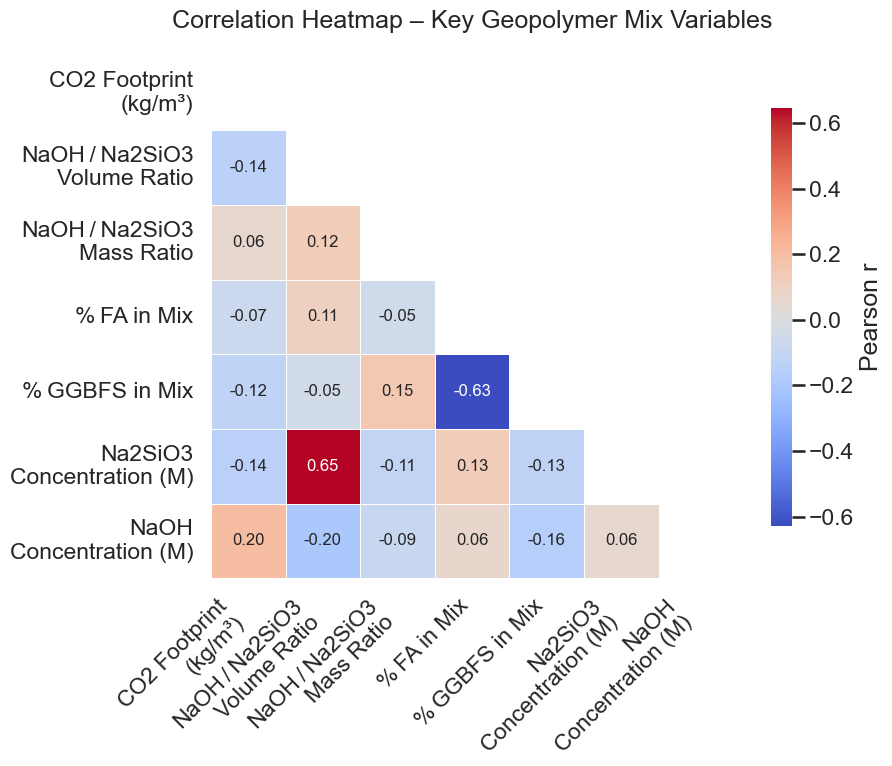

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# select and rename columns for readability
cols = {
    "CO2 footprint\n(kg emision per 1m3 of samples produced and cured)\n[108] and [109] used": "CO2 Footprint\n(kg/m³)",
    "Ratio NaOH to Na2SiO3 (by volume)":   "NaOH / Na2SiO3\nVolume Ratio",
    "Ratio NaOH to Na2SiO3 (by mass)":     "NaOH / Na2SiO3\nMass Ratio",
    "%FA in Mix ratio":                    "% FA in Mix",
    "%GGBFS in Mix ratio":                 "% GGBFS in Mix",
    "Na2SiO3_molarity_solution":           "Na2SiO3\nConcentration (M)",
    "Concentration (M) NaOH":              "NaOH\nConcentration (M)"
}

# create a new DataFrame with renamed columns
df_corr = df[list(cols.keys())].rename(columns=cols)

# compute Pearson correlation matrix
corr_matrix = df_corr.corr(method="pearson")

# set seaborn aesthetic parameters
sns.set_theme(style="white", context="talk")

# create a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": .8, "label": "Pearson r"},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 12}
)

plt.title("Correlation Heatmap – Key Geopolymer Mix Variables", pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


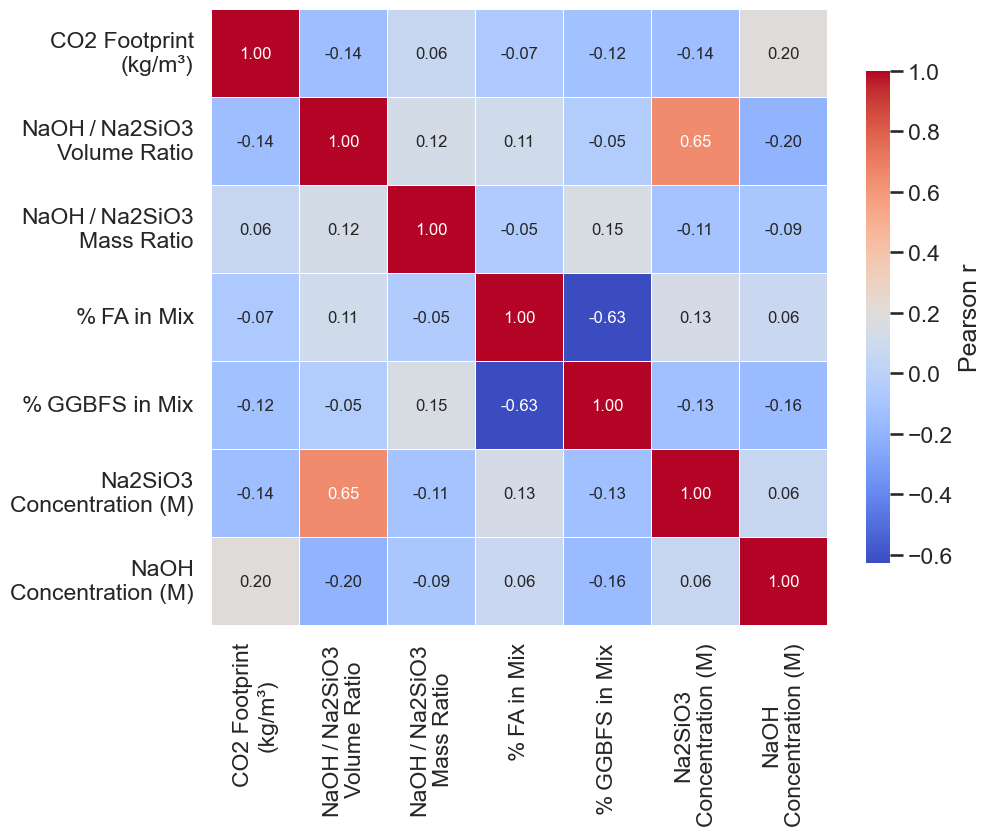

In [227]:
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": .8, "label": "Pearson r"},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 12}
)
plt.show()


In [229]:
# mapping of old names → new names
cols = {
    "CO2 footprint\n(kg emision per 1m3 of samples produced and cured)\n[108] and [109] used": "CO2 Footprint\n(kg/m³)",
    "Ratio NaOH to Na2SiO3 (by volume)":   "NaOH / Na2SiO3\nVolume Ratio",
    "Ratio NaOH to Na2SiO3 (by mass)":     "NaOH / Na2SiO3\nMass Ratio",
    "%FA in Mix ratio":                    "% FA in Mix",
    "%GGBFS in Mix ratio":                 "% GGBFS in Mix",
    "Na2SiO3_molarity_solution":           "Na2SiO3\nConcentration (M)",
    "Concentration (M) NaOH":              "NaOH\nConcentration (M)"
}

# permanently rename columns in-place
df.rename(columns=cols, inplace=True)

# verify
print(df.columns)


Index(['Idx_Sample', 'Ref.', 'Mixture Code in Ref', 'FA (kg/m3)',
       'GGBFS (kg/m3)', 'Total Na2SiO3 (kg in 1m3 of mix)',
       'Total NaOH (kg in 1m3 mix)', 'NaOH\nConcentration (M)',
       'Superplasticizer (kg in 1m3 mix)',
       '7-d Cubic compressive strength (MPa)',
       '28-d Cubic compressive strength (MPa)',
       '90-d Cubic compressive strength (MPa) ',
       '365-d Cubic compressive strength (MPa) ',
       '7-d Cylindrical compressive strength (MPa)',
       '28-d Cylindrical compressive strength (MPa)',
       '56-d Cylindrical compressive strength (MPa) ',
       '90-d Cylindrical compressive strength (MPa)', '180-d Ec (MPa) ',
       '28-d WA (%)', '28-d Porosity/AVPV (%)', '28-d Water permeability (mm)',
       '28-d Abrasion resistance (mm)', '28-d UPV (m/s)',
       '28-d sorptivity(m/s^0.5)', 'Slump (mm)', 'flowtable', 'Seeting I',
       'Setting F', 'CO2 Footprint\n(kg/m³)', '% FA in Mix', '% GGBFS in Mix',
       'Na2SiO3\nConcentration (M)', 'NaOH / N

In [235]:
df.to_csv("Geopolymer_cleaned.csv", index=False)

In [279]:
df= pd.read_csv('Geopolymer_cleaned.csv')

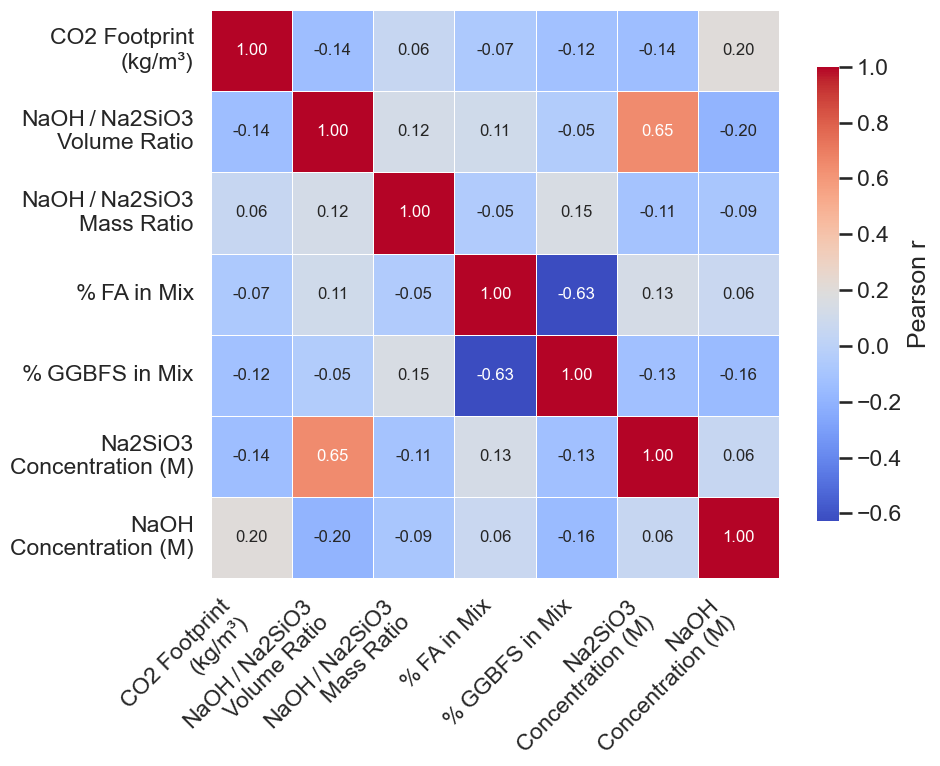

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

# list of the permanently renamed columns to include
columns = [
    "CO2 Footprint\n(kg/m³)",
    "NaOH / Na2SiO3\nVolume Ratio",
    "NaOH / Na2SiO3\nMass Ratio",
    "% FA in Mix",
    "% GGBFS in Mix",
    "Na2SiO3\nConcentration (M)",
    "NaOH\nConcentration (M)"
]

# compute Pearson correlation matrix
corr = df[columns].corr(method="pearson")

# set up the figure
plt.figure(figsize=(10, 8))
sns.set_theme(style="white", context="talk")

# draw the full heatmap (no mask)
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": .8, "label": "Pearson r"},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 12}
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# save the figure at 500 DPI
plt.savefig("Geopolymer_correlation_heatmap_full.png", dpi=500, bbox_inches="tight")

plt.show()


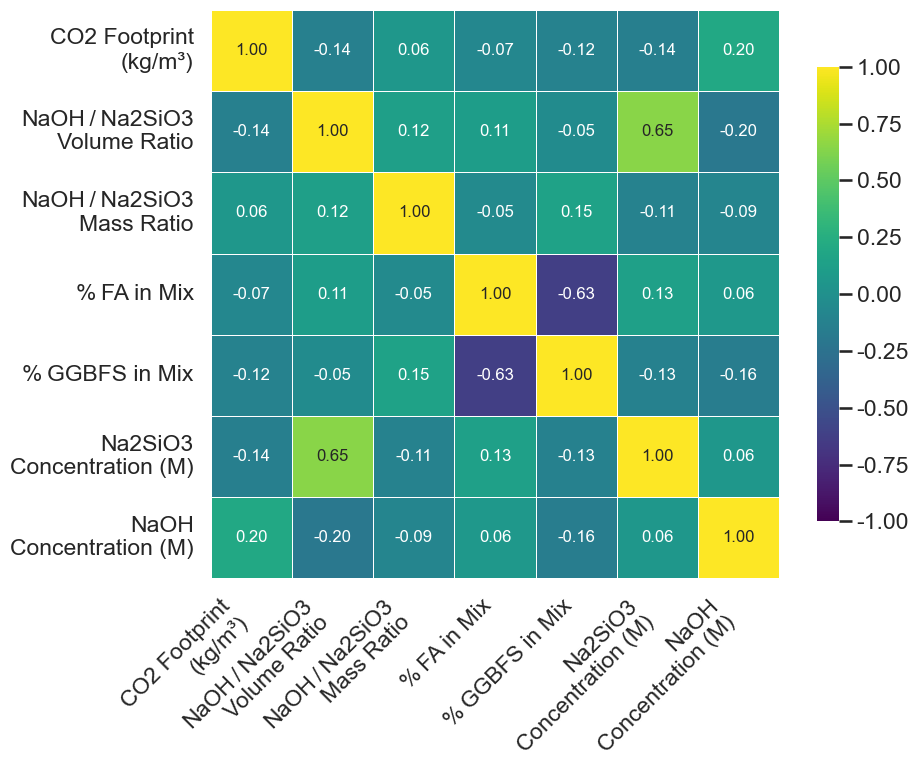

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# list of the permanently renamed columns to include
columns = [
    "CO2 Footprint\n(kg/m³)",
    "NaOH / Na2SiO3\nVolume Ratio",
    "NaOH / Na2SiO3\nMass Ratio",
    "% FA in Mix",
    "% GGBFS in Mix",
    "Na2SiO3\nConcentration (M)",
    "NaOH\nConcentration (M)"
]

# compute Pearson correlation matrix
corr = df[columns].corr(method="pearson")

# set up the figure
plt.figure(figsize=(10, 8))
sns.set_theme(style="white", context="talk")

ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="viridis",      # viridis gives the purple→yellow ramp
    vmin=-1, vmax=1,     # fixes the color‐range from -1 to +1
    linewidths=0.5,
    square=True,
    annot_kws={"size": 12},
    cbar_kws={
        "shrink": 0.8,
        "ticks": np.linspace(-1, 1, 9),  # -1.00, -0.75, …, 1.00
        "format": "%.2f"                  # two-decimal formatting
    }
)

# rotate labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.savefig("Geopolymer_correlation_heatmap_full.png", dpi=500, bbox_inches="tight")
plt.show()


Algorithm: Random Forest Regressor + Simulated Annealing Optimization

Training model with Random Forest Regressor...
Training complete.

Running Simulated Annealing Optimization on the trained model...
Optimization complete.

Validation metrics:
 • R²   = 0.7448
 • MSE  = 3687.3009
 • RMSE = 60.7232
 • MAE  = 24.5640

Optimal mix ratios found:
 • NaOH/Na2SiO3 Volume Ratio      = 0.2704
 • NaOH/Na2SiO3 Mass Ratio        = 0.8215
 • % FA in Mix                    = 15.7298
 • % GGBFS in Mix                 = 0.1908
 • Na2SiO3 Concentration (M)      = 4.6066
 • NaOH Concentration (M)         = 7.4614

Predicted CO2 Footprint at optimum: 863.9607 kg/m3



/var/folders/7n/jnsm4rc54z7076rb3t0l20780000gn/T/ipykernel_50415/2733604758.py:111: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from current font.
  plt.tight_layout()
/var/folders/7n/jnsm4rc54z7076rb3t0l20780000gn/T/ipykernel_50415/2733604758.py:112: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from current font.
  plt.savefig("optimal_mix_parameters.png", dpi=500, bbox_inches="tight")


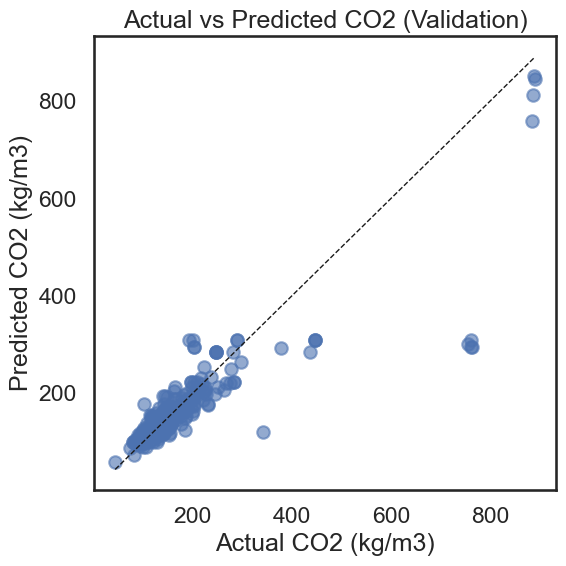

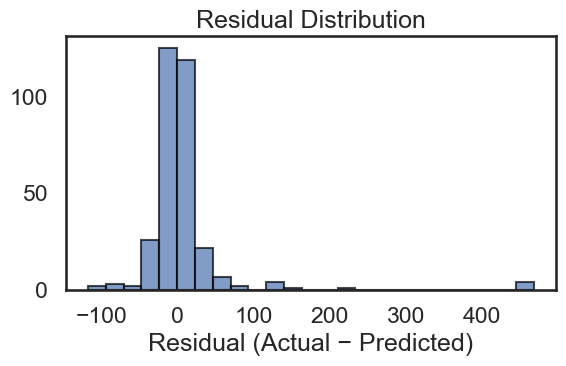

/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


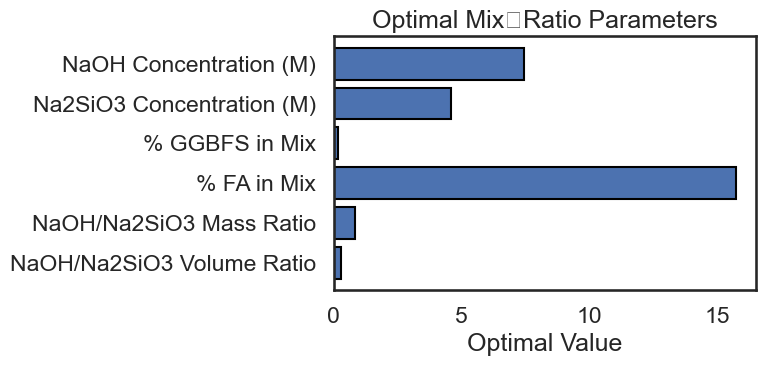

In [254]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.optimize import dual_annealing
import matplotlib.pyplot as plt

# --- 0) Rename columns to plain ASCII (no subscripts/superscripts) ---
df = df.rename(columns={
    "CO2 Footprint\n(kg/m³)":        "CO2 Footprint (kg/m3)",
    "NaOH / Na2SiO3\nVolume Ratio":  "NaOH/Na2SiO3 Volume Ratio",
    "NaOH / Na2SiO3\nMass Ratio":    "NaOH/Na2SiO3 Mass Ratio",
    "% FA in Mix":                   "% FA in Mix",
    "% GGBFS in Mix":                "% GGBFS in Mix",
    "Na2SiO3\nConcentration (M)":    "Na2SiO3 Concentration (M)",
    "NaOH\nConcentration (M)":       "NaOH Concentration (M)"
})

# --- 1) Specify features and target ---
features = [
    "NaOH/Na2SiO3 Volume Ratio",
    "NaOH/Na2SiO3 Mass Ratio",
    "% FA in Mix",
    "% GGBFS in Mix",
    "Na2SiO3 Concentration (M)",
    "NaOH Concentration (M)"
]
target = "CO2 Footprint (kg/m3)"

# --- 2) Split into train/validation ---
X = df[features].values
y = df[target].values

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# --- 3) Train the regression model ---
print("Algorithm: Random Forest Regressor + Simulated Annealing Optimization\n")
print("Training model with Random Forest Regressor...")
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
print("Training complete.\n")

# --- 4) Set up Simulated Annealing ---
print("Running Simulated Annealing Optimization on the trained model...")
# bounds for each feature based on training data range
mins, maxs = X_train.min(axis=0), X_train.max(axis=0)
bounds = [(lo, hi) for lo, hi in zip(mins, maxs)]

def objective(x):
    """Negate prediction so that dual_annealing (which minimizes) will maximize CO2."""
    return -model.predict(x.reshape(1, -1))[0]

result = dual_annealing(
    objective,
    bounds,
    maxiter=1000,
    seed=42
)
opt_x   = result.x
opt_co2 = -result.fun
print("Optimization complete.\n")

# --- 5) Validation metrics ---
y_pred = model.predict(X_val)
mse  = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_val, y_pred)
r2   = r2_score(y_val, y_pred)

print("Validation metrics:")
print(f" • R²   = {r2:.4f}")
print(f" • MSE  = {mse:.4f}")
print(f" • RMSE = {rmse:.4f}")
print(f" • MAE  = {mae:.4f}\n")

print("Optimal mix ratios found:")
for feat, val in zip(features, opt_x):
    print(f" • {feat:<30} = {val:.4f}")
print(f"\nPredicted CO2 Footprint at optimum: {opt_co2:.4f} kg/m3\n")

# --- 6) Publication‐ready plots (saved at 500 dpi) ---

# 6a) Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred, alpha=0.6)
lim = [min(y_val.min(), y_pred.min()), max(y_val.max(), y_pred.max())]
plt.plot(lim, lim, 'k--', lw=1)
plt.xlabel("Actual CO2 (kg/m3)")
plt.ylabel("Predicted CO2 (kg/m3)")
plt.title("Actual vs Predicted CO2 (Validation)")
plt.tight_layout()
plt.savefig("actual_vs_predicted_CO2.png", dpi=500, bbox_inches="tight")

# 6b) Residual distribution
residuals = y_val - y_pred
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=25, edgecolor='black', alpha=0.7)
plt.xlabel("Residual (Actual − Predicted)")
plt.title("Residual Distribution")
plt.tight_layout()
plt.savefig("residual_distribution.png", dpi=500, bbox_inches="tight")

# 6c) Optimal mix parameter bars
plt.figure(figsize=(8,8))
plt.barh(features, opt_x, edgecolor='black')
plt.xlabel("Optimal Value")
plt.title("Optimal Mix‐Ratio Parameters")
plt.tight_layout()
plt.savefig("optimal_mix_parameters.png", dpi=500, bbox_inches="tight")

plt.show()


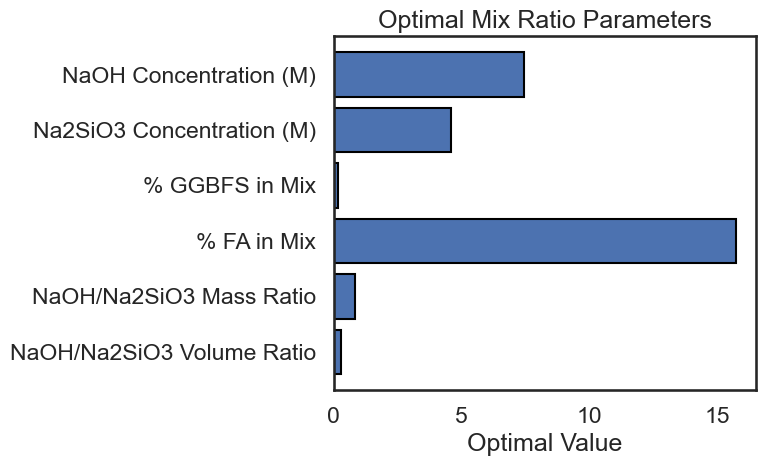

In [264]:
plt.figure(figsize=(8,5))
plt.barh(features, opt_x, edgecolor='black')
plt.xlabel("Optimal Value")
plt.title("Optimal Mix Ratio Parameters")
plt.tight_layout()
plt.savefig("optimal_mix_parameters.png", dpi=500, bbox_inches="tight")

plt.show()

Initializing NUTS using jitter+adapt_diag...


Algorithm: Bayesian linear regression via MCMC



Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 4 seconds.


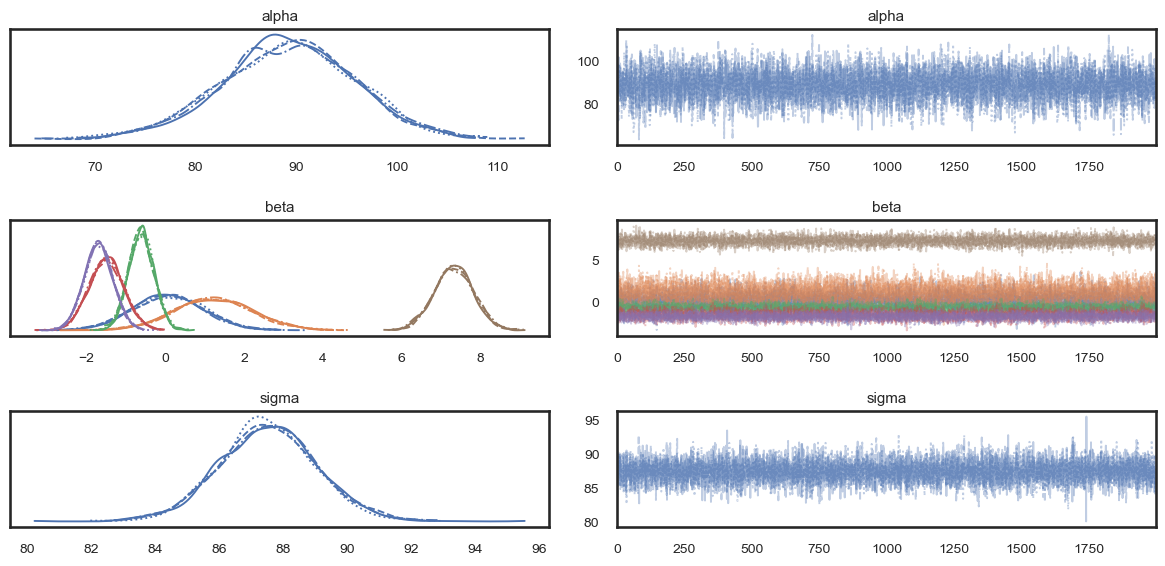

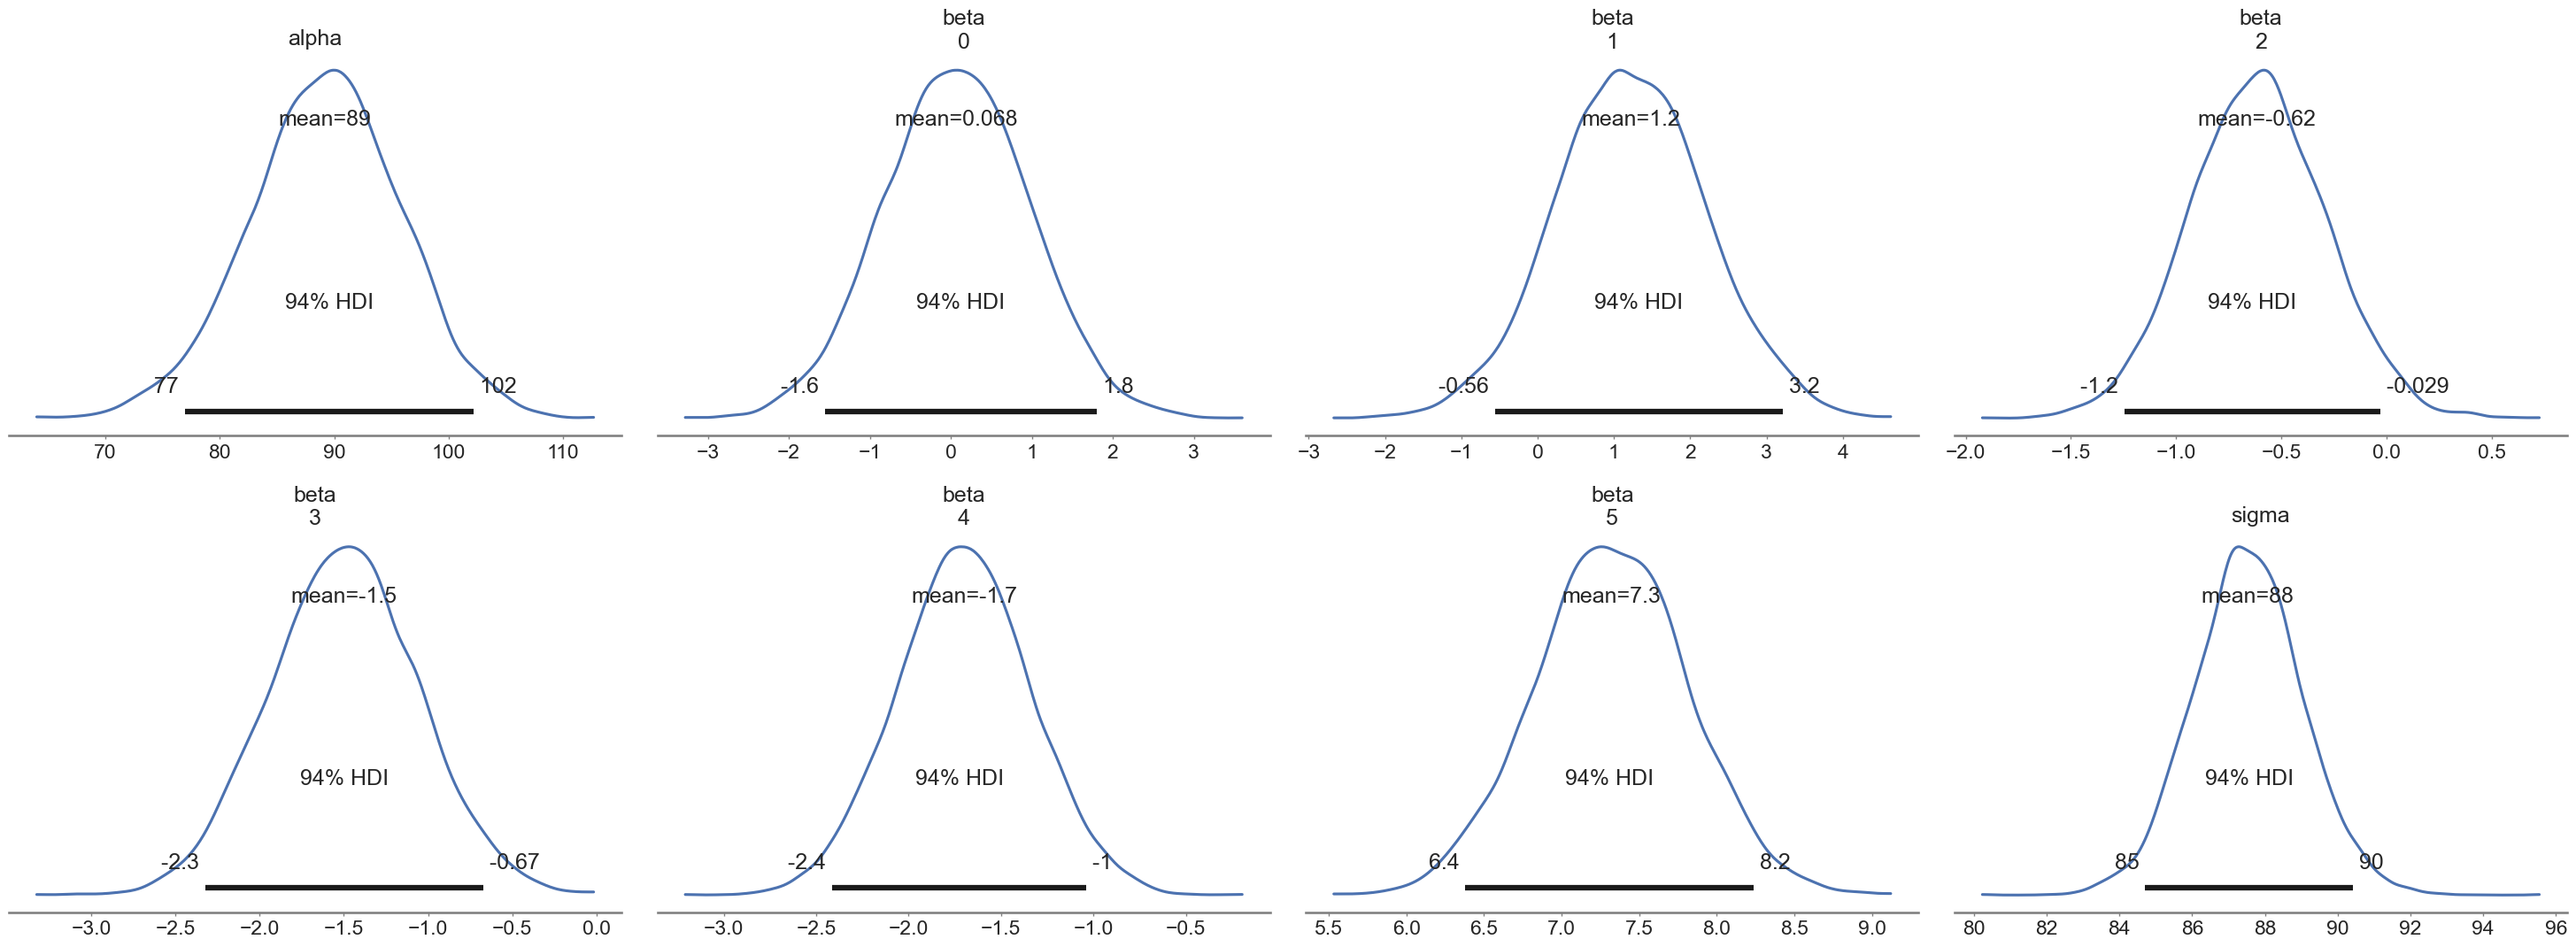

Optimal mix ratios (via MCMC posterior‐mean search):
 • NaOH/Na2SiO3 Volume Ratio      = 2.7353
 • NaOH/Na2SiO3 Mass Ratio        = 2.7158
 • % FA in Mix                    = 6.4137
 • % GGBFS in Mix                 = 1.4925
 • Na2SiO3 Concentration (M)      = 0.7564
 • NaOH Concentration (M)         = 22.5124

Predicted CO2 Footprint (posterior mean) = 250.0258 kg/m3


In [275]:
import numpy as np
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt

# 0) Rename columns to plain ASCII
df = df.rename(columns={
    "CO2 Footprint\n(kg/m³)":       "CO2 Footprint (kg/m3)",
    "NaOH / Na2SiO3\nVolume Ratio": "NaOH/Na2SiO3 Volume Ratio",
    "NaOH / Na2SiO3\nMass Ratio":   "NaOH/Na2SiO3 Mass Ratio",
    "% FA in Mix":                  "% FA in Mix",
    "% GGBFS in Mix":               "% GGBFS in Mix",
    "Na2SiO3\nConcentration (M)":   "Na2SiO3 Concentration (M)",
    "NaOH\nConcentration (M)":      "NaOH Concentration (M)"
})

# 1) Define features and target
features = [
    "NaOH/Na2SiO3 Volume Ratio",
    "NaOH/Na2SiO3 Mass Ratio",
    "% FA in Mix",
    "% GGBFS in Mix",
    "Na2SiO3 Concentration (M)",
    "NaOH Concentration (M)"
]
target = "CO2 Footprint (kg/m3)"

X = df[features].values
y = df[target].values

print("Algorithm: Bayesian linear regression via MCMC\n")

# 2) Build and sample the model
with pm.Model() as co2_model:
    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta  = pm.Normal("beta", mu=0, sigma=1, shape=len(features))
    sigma = pm.HalfNormal("sigma", sigma=10)

    # Linear predictor
    mu = alpha + pm.math.dot(X, beta)

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # Sample with 4 chains, 1k tune and 2k draws; return InferenceData
    idata = pm.sample(
        draws=2000,
        tune=1000,
        chains=4,
        target_accept=0.95,
        random_seed=42,
        return_inferencedata=True
    )

# 3) Trace and posterior plots
pm.plot_trace(idata)
plt.tight_layout()
plt.savefig("co2_trace_plots.png", dpi=500, bbox_inches="tight")
plt.show()

pm.plot_posterior(idata)
plt.tight_layout()
plt.savefig("co2_posterior_distributions.png", dpi=500, bbox_inches="tight")
plt.show()

# 4) Posterior‐mean prediction helper
def posterior_mean_prediction(idata, X_new):
    """
    Compute posterior‐mean predictions for CO2:
      E[alpha + X_new @ beta] across posterior samples.
    """
    # Extract posterior samples
    alpha_samps = idata.posterior["alpha"].values.flatten()               # (chains * draws,)
    beta_samps  = idata.posterior["beta"].values                           # (chains, draws, n_features)
    beta_samps  = beta_samps.reshape(-1, beta_samps.shape[-1])             # (n_samples, n_features)

    # Compute preds shape (n_samples, n_candidates)
    preds = beta_samps.dot(X_new.T) + alpha_samps[:, None]
    return preds.mean(axis=0)  # (n_candidates,)

# 5) Generate random candidate mixes within observed bounds
mins = X.min(axis=0)
maxs = X.max(axis=0)
N_can = 10_000
candidates = np.random.uniform(mins, maxs, size=(N_can, len(features)))

# 6) Compute posterior‐mean CO2 for each candidate
mean_co2 = posterior_mean_prediction(idata, candidates)

# 7) Select the candidate with highest predicted CO2
best_idx      = np.argmax(mean_co2)
best_mix      = candidates[best_idx]
best_pred_co2 = mean_co2[best_idx]

# 8) Output optimal mix and predicted CO2
print("Optimal mix ratios (via MCMC posterior‐mean search):")
for feat, val in zip(features, best_mix):
    print(f" • {feat:<30} = {val:.4f}")
print(f"\nPredicted CO2 Footprint (posterior mean) = {best_pred_co2:.4f} kg/m3")


In [282]:
df.shape 

(1588, 34)

In [284]:
df

,Idx_Sample,Ref.,Mixture Code in Ref,FA (kg/m3),GGBFS (kg/m3),Total Na2SiO3 (kg in 1m3 of mix),Total NaOH (kg in 1m3 mix),NaOH\nConcentration (M),Superplasticizer (kg in 1m3 mix),7-d Cubic compressive strength (MPa),28-d Cubic compressive strength (MPa),90-d Cubic compressive strength (MPa),365-d Cubic compressive strength (MPa),7-d Cylindrical compressive strength (MPa),28-d Cylindrical compressive strength (MPa),56-d Cylindrical compressive strength (MPa),90-d Cylindrical compressive strength (MPa),180-d Ec (MPa),28-d WA (%),28-d Porosity/AVPV (%),28-d Water permeability (mm),28-d Abrasion resistance (mm),28-d UPV (m/s),28-d sorptivity(m/s^0.5),Slump (mm),flowtable,Seeting I,Setting F,CO2 Footprint\n(kg/m³),% FA in Mix,% GGBFS in Mix,Na2SiO3\nConcentration (M),NaOH / Na2SiO3\nVolume Ratio,NaOH / Na2SiO3\nMass Ratio
0,1,[2],FA-I,476.0,NaN,48.00,120.00,8.0,0.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.048733,19.669421,0.000000,12.464624,11.886188,2.500000
1,2,[2],FA-I,476.0,NaN,120.00,48.00,8.0,0.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.923522,19.669421,0.000000,12.464624,1.901790,0.400000
2,3,[2],FA-I,476.0,NaN,120.00,48.00,8.0,0.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.131856,19.669421,0.000000,12.464624,1.901790,0.400000
3,4,[2],FA-I,476.0,NaN,120.00,48.00,8.0,0.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.340189,19.669421,0.000000,12.464624,1.901790,0.400000
4,5,[2],FA-I,476.0,NaN,120.00,48.00,8.0,0.0,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.597133,19.669421,0.000000,12.464624,1.901790,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,1752,[107],23,NaN,400.0,128.57,51.43,14.0,12.0,68.19,77.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.124999,0.000000,13.745704,12.221448,1.065577,0.400016
1584,1753,[107],24,NaN,400.0,127.27,72.73,14.0,12.0,42.28,46.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.826319,0.000000,13.745704,12.221448,1.522284,0.571462
1585,1754,[107],25,NaN,400.0,101.82,58.18,14.0,12.0,52.52,53.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.114832,0.000000,13.745704,12.221448,1.522119,0.571401
1586,1755,[107],26,NaN,400.0,137.65,42.35,14.0,12.0,61.86,78.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.364740,0.000000,13.745704,12.221448,0.819568,0.307664


In [288]:
# -- assume df already exists --

# 1) Drop rows where '28-d Cubic compressive strength (MPa)' is NaN
df_strength = df.dropna(subset=['28-d Cubic compressive strength (MPa)']).reset_index(drop=True)

# 2) (Optional) Inspect the result
print(f"Original rows: {len(df):,}")
print(f"After drop:     {len(df_strength):,}")
df_strength.shape

Original rows: 1,588
After drop:     700


(700, 34)

In [292]:
df_strength.to_csv('df_cleaned_strength.csv')

In [296]:
df_strength.head()

,Idx_Sample,Ref.,Mixture Code in Ref,FA (kg/m3),GGBFS (kg/m3),Total Na2SiO3 (kg in 1m3 of mix),Total NaOH (kg in 1m3 mix),NaOH\nConcentration (M),Superplasticizer (kg in 1m3 mix),7-d Cubic compressive strength (MPa),28-d Cubic compressive strength (MPa),90-d Cubic compressive strength (MPa),365-d Cubic compressive strength (MPa),7-d Cylindrical compressive strength (MPa),28-d Cylindrical compressive strength (MPa),56-d Cylindrical compressive strength (MPa),90-d Cylindrical compressive strength (MPa),180-d Ec (MPa),28-d WA (%),28-d Porosity/AVPV (%),28-d Water permeability (mm),28-d Abrasion resistance (mm),28-d UPV (m/s),28-d sorptivity(m/s^0.5),Slump (mm),flowtable,Seeting I,Setting F,CO2 Footprint\n(kg/m³),% FA in Mix,% GGBFS in Mix,Na2SiO3\nConcentration (M),NaOH / Na2SiO3\nVolume Ratio,NaOH / Na2SiO3\nMass Ratio
0,129,[3],Batch,465.0,NaN,38.3625,217.3875,12.5,0.0,NaN,43.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.830365,19.214876,0.0,0.0,0.0,5.666667
1,147,[7],NaN,400.0,NaN,171.4200,68.5700,10.0,6.0,25.22,27.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,NaN,NaN,NaN,158.022153,16.666667,0.0,0.0,0.0,0.400012
2,148,[7],NaN,400.0,NaN,171.4200,68.5700,12.0,6.0,27.38,29.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,168.527077,16.666667,0.0,0.0,0.0,0.400012
3,149,[7],NaN,400.0,NaN,171.4200,68.5700,14.0,6.0,28.18,31.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,NaN,NaN,NaN,179.032001,16.666667,0.0,0.0,0.0,0.400012
4,150,[7],NaN,400.0,NaN,171.4200,68.5700,16.0,6.0,29.80,32.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,189.536925,16.666667,0.0,0.0,0.0,0.400012
